# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

### DESCRIZIONE DEL CODICE

##### Il codice che implementa l'algoritmo di Simulated Annealing è contenuto nella directory "non_parallelo", mentre il codice in questa directory è quello implementato per l'esercizio 10.2; il codice contiene:

- funzione input: legge le informazioni di input (temperatura iniziale, numero di raffreddamenti, numero di mosse metropolis ad ogni temperatura...) e genera la configurazione delle città e il primo cammino possibile;

- GenerateCirc/GenerateSquare: generano le due configurazioni di città a seconda del valore di generate passato da input;

- NewPath: genera un nuovo percorso;

- Measure: calcola la lunghezza del percorso creato;

- Copy: salva il percorso creato e la sua lunghezza;

- Check: controlla che il percorso creato rispetti le boundary conditions;

- Pbc: permettono il calcolo del percorso in boundary conditions;

- Exchange: permette di creare un nuovo percorso mischiando l'ordine del precedente;

- savepath/ savedata: salvano gli output;

- Elitair: salva in variabili a parte il percorso migliore visitato;

#### RISULTATO PER LA CIRCONFERENZA

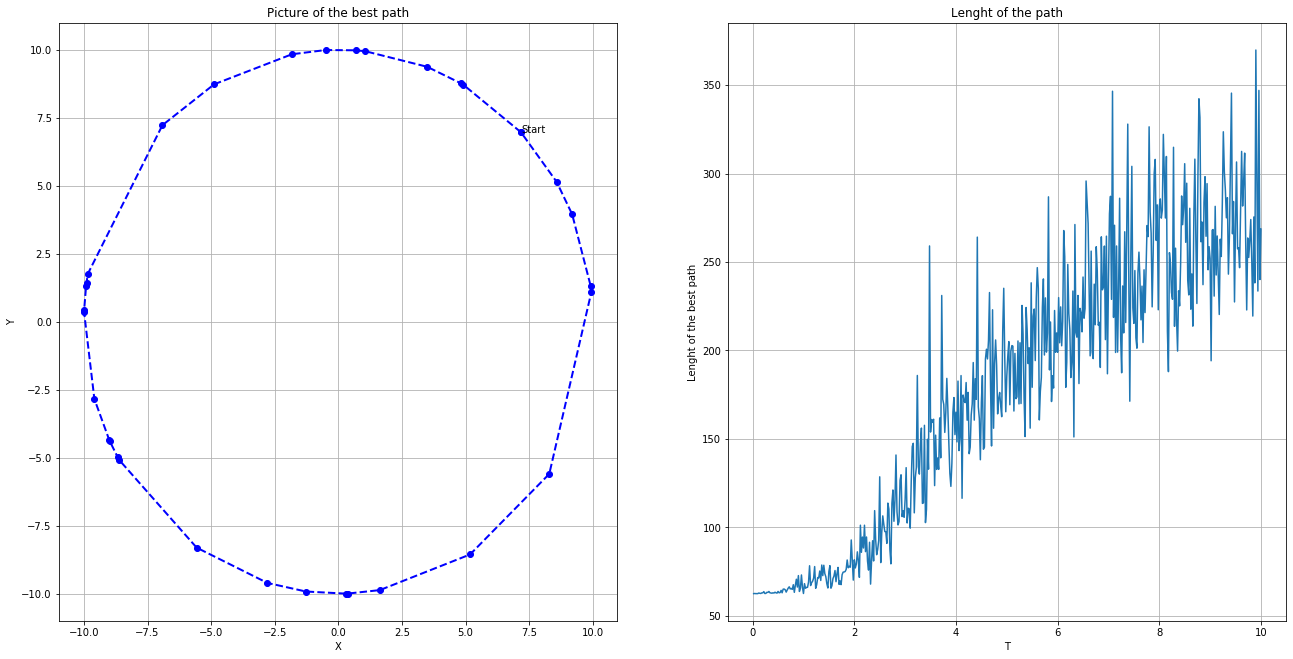

lunghezza del percorso migliore: 62.403
cicli di raffreddamento: 500


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Coord = np.loadtxt('beta_test_Circ/CircumferencePath.dat').T
costo = np.loadtxt('beta_test_Circ/cooling_lenght.dat').T
iters = np.arange(5000)

plt.figure(figsize=[22,11])
plt.subplot(1,2,1)
plt.plot(Coord[0], Coord[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord[0][0],Coord[1][0]))
plt.title('Picture of the best path')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(1,2,2)
plt.plot(costo[0],costo[1])
plt.title('Lenght of the path')
plt.xlabel('T')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print("lunghezza del percorso migliore:" , costo[1][499])
print("cicli di raffreddamento: 500")

### RISULTATI PER IL QUADRATO

Nel quadrato, SA ha ottenuto un risultato migliore di GA.

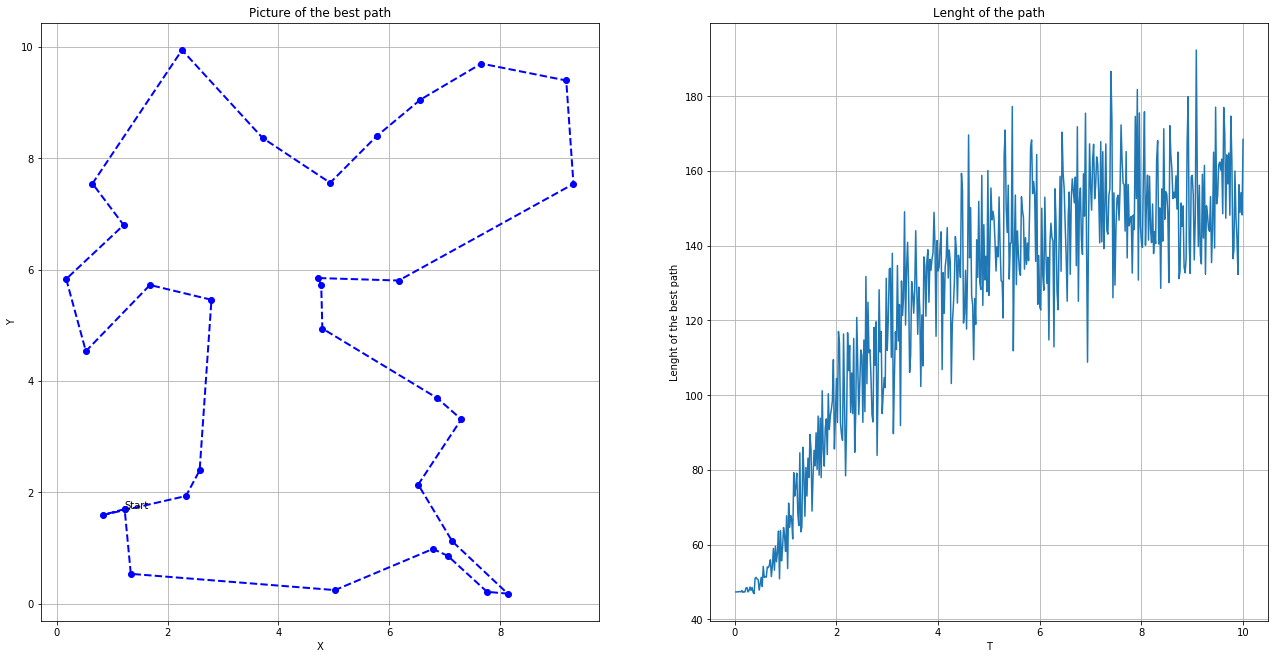

lunghezza del percorso migliore: 47.2957
cicli di raffreddamento: 500


In [2]:
Coord = np.loadtxt('dataSquare/SquarePath.dat').T
costo = np.loadtxt('dataSquare/cooling_lenght.dat').T
iters = np.arange(5000)

plt.figure(figsize=[22,11])
plt.subplot(1,2,1)
plt.plot(Coord[0], Coord[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (Coord[0][0],Coord[1][0]))
plt.title('Picture of the best path')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(1,2,2)
plt.plot(costo[0],costo[1])
plt.title('Lenght of the path')
plt.xlabel('T')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print("lunghezza del percorso migliore:" , costo[1][499])
print("cicli di raffreddamento: 500")

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

### UPGRADE DEL CODICE GA PER IL CALCOLO IN PARALLELO

###### Nuove variabili:

- Una variabile "migrations", passata da input, che determina ogni quante iterazioni avviene la migrazione dei cromosomi (fissata inizialmente a 100).
- Due variabili "send" e "lenghtsend" che scambiano il messaggio.

###### Funzioni modificate:

Input(int rank, int size): la funzione di input riceve come argomenti il numero di nodi e il rank del nodo; questo serve per la generazione della configurazione delle città; il nodo di rank 0 genera la configurazione delle città (che così risulta analoga a quella generata nella precedente esercitazione), quindi la invia al nodo di rank 1; a questo punto, solo se il numero di nodi è maggiore di 2 il nodo di rank 1 invia la configurazione al nodo di rank 3, e di nuovo se il numero di nodi è maggiore di 3 il nodo di rank 3 invia la configurazione al nodo di rank 4 (ho scritto il codice per lavorare con un numero di nodi da 2 a 4).

###### Nuove funzioni per il calcolo in parallelo:

- Migrazione(): Chiama nel main la migrazione tra i nodi;
- Nodes2/3/4(): Eseguono la migrazione per 2,3,4 nodi (la funzione corretta è chiamata da Migrazione in base alla size
- CopySend(): copia il miglior individuo e la sua lunghezza nelle variabili per la migrazione;
- CopyRecv(): copia l'individuo ricevuto e la sua lunghezza nelle variabili utilizzate dall'algoritmo;
- SendCoordinates(): Funzione chiamata da Input per la comunicazione delle coordinate delle città, create solo dal nodo di rank 0, agli altri nodi;

Ho eseguito il calcolo, per la stessa configurazione di Input (10000 iterazioni dell'algoritmo, 32 città, 400 individui nella popolazione, migrazione ogni 50 iterazioni), utilizzando da 2 a 4 nodi; il risultato migliore si è ottenuto con 3 nodi, risultato migliore anche di quello ottenuto dal GA senza il calcolo in parallelo e dal SA (esercizio 10.1); per 2 o 4 nodi il risultato è peggiore di tutti gli altri.

#### Risultati per 2 nodi di calcolo

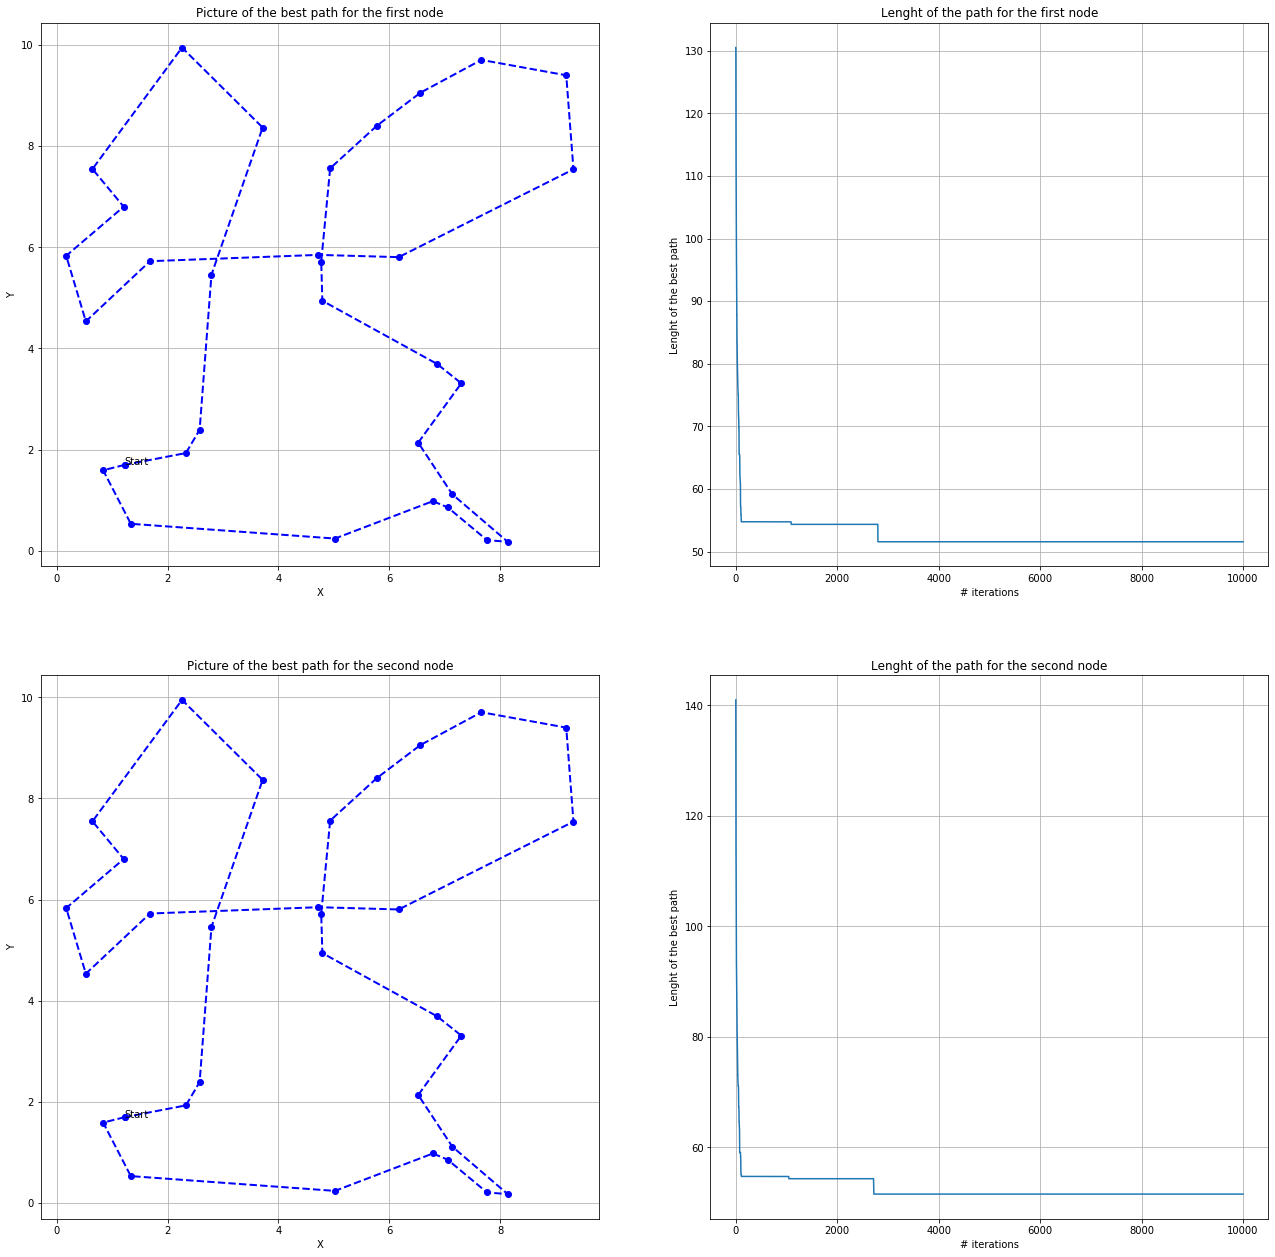

Lenght of the best path for the first node =  51.5618
Lenght of the best path for the second node =  51.5618


In [3]:
path0 = np.loadtxt('parallelo/2nodi/SquarePath0.dat').T
path1 = np.loadtxt('parallelo/2nodi/SquarePath1.dat').T
lenght0 = np.loadtxt('parallelo/2nodi/Lenght_of_the_best_path0.dat')
lenght1 = np.loadtxt('parallelo/2nodi/Lenght_of_the_best_path1.dat')
iters = np.arange(10000)

plt.figure(figsize=[22,22])
plt.subplot(2,2,1)
plt.plot(path0[0], path0[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path0[0][0],path0[1][0]))
plt.title('Picture of the best path for the first node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,2,2)
plt.plot(iters + 1, lenght0)
plt.title('Lenght of the path for the first node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(2,2,3)
plt.plot(path1[0], path1[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path1[0][0],path1[1][0]))
plt.title('Picture of the best path for the second node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(2,2,4)
plt.plot(iters + 1, lenght1)
plt.title('Lenght of the path for the second node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print('Lenght of the best path for the first node = ',lenght0[9999])
print('Lenght of the best path for the second node = ',lenght1[9999])

#### Risultati per 3 nodi di calcolo

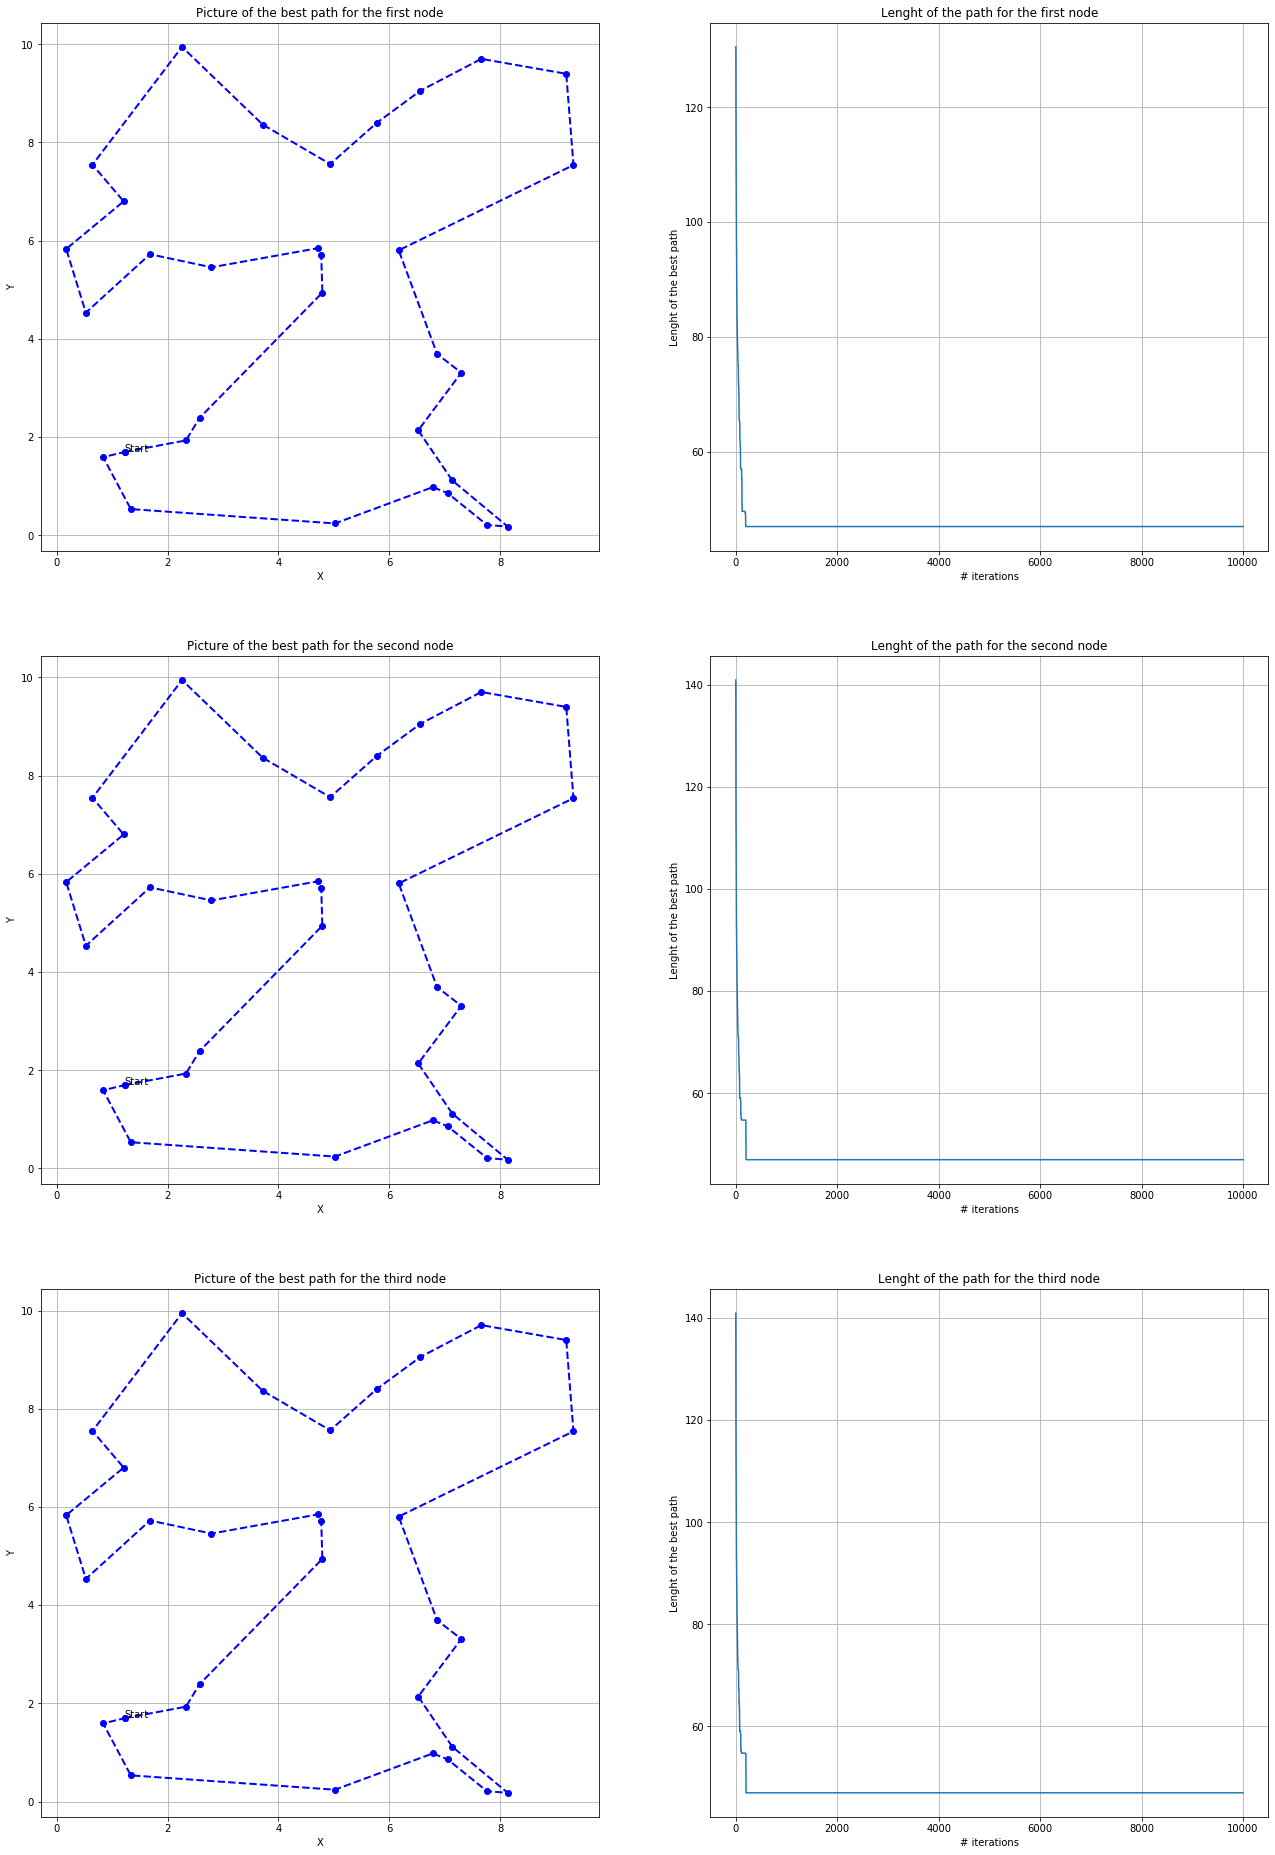

Lenght of the best path for the first node =  46.9884
Lenght of the best path for the second node =  46.9884
Lenght of the best path for the third node =  46.9884


In [4]:
path0 = np.loadtxt('parallelo/3nodi/SquarePath0.dat').T
path1 = np.loadtxt('parallelo/3nodi/SquarePath1.dat').T
path2 = np.loadtxt('parallelo/3nodi/SquarePath2.dat').T
lenght0 = np.loadtxt('parallelo/3nodi/Lenght_of_the_best_path0.dat')
lenght1 = np.loadtxt('parallelo/3nodi/Lenght_of_the_best_path1.dat')
lenght2 = np.loadtxt('parallelo/3nodi/Lenght_of_the_best_path2.dat')
iters = np.arange(10000)

plt.figure(figsize=[22,33])
plt.subplot(3,2,1)
plt.plot(path0[0], path0[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path0[0][0],path0[1][0]))
plt.title('Picture of the best path for the first node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,2)
plt.plot(iters + 1, lenght0)
plt.title('Lenght of the path for the first node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(3,2,3)
plt.plot(path1[0], path1[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path1[0][0],path1[1][0]))
plt.title('Picture of the best path for the second node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,4)
plt.plot(iters + 1, lenght1)
plt.title('Lenght of the path for the second node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(3,2,5)
plt.plot(path2[0], path2[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path2[0][0],path2[1][0]))
plt.title('Picture of the best path for the third node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,6)
plt.plot(iters + 1, lenght2)
plt.title('Lenght of the path for the third node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print('Lenght of the best path for the first node = ',lenght0[9999])
print('Lenght of the best path for the second node = ',lenght1[9999])
print('Lenght of the best path for the third node = ',lenght2[9999])

#### Risultati per 4 nodi di calcolo

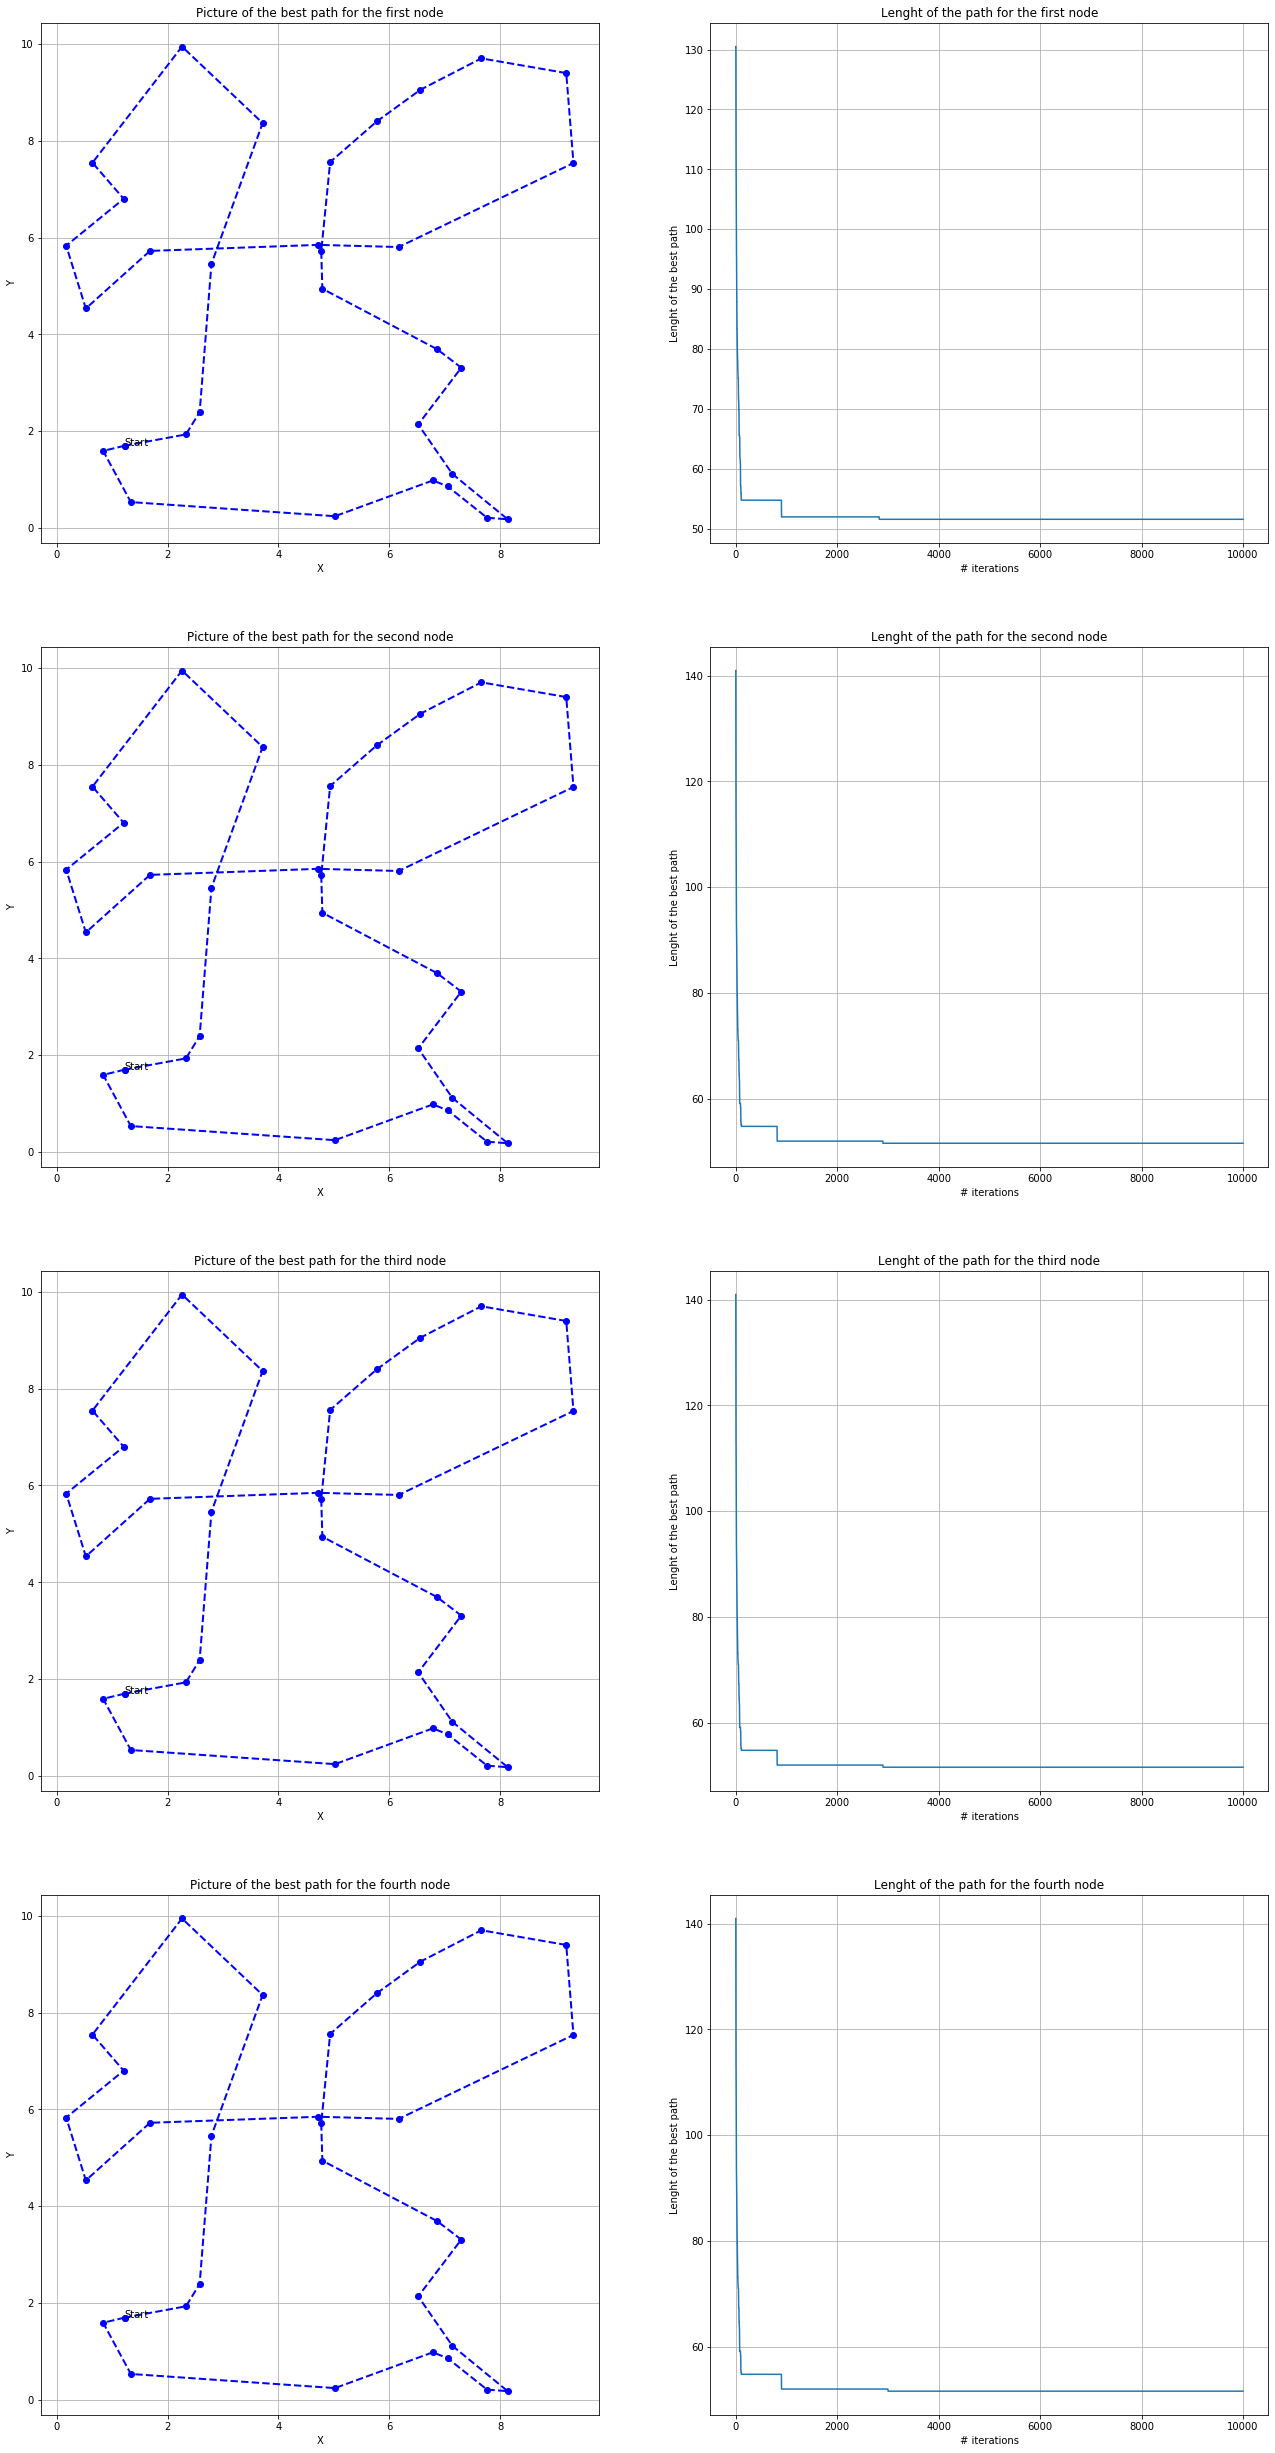

Lenght of the best path for the first node =  51.5618
Lenght of the best path for the second node =  51.5618
Lenght of the best path for the third node =  51.5618
Lenght of the best path for the fourth node =  51.5618


In [5]:
path0 = np.loadtxt('parallelo/4nodi/SquarePath0.dat').T
path1 = np.loadtxt('parallelo/4nodi/SquarePath1.dat').T
path2 = np.loadtxt('parallelo/4nodi/SquarePath2.dat').T
path3 = np.loadtxt('parallelo/4nodi/SquarePath3.dat').T
lenght0 = np.loadtxt('parallelo/4nodi/Lenght_of_the_best_path0.dat')
lenght1 = np.loadtxt('parallelo/4nodi/Lenght_of_the_best_path1.dat')
lenght2 = np.loadtxt('parallelo/4nodi/Lenght_of_the_best_path2.dat')
lenght3 = np.loadtxt('parallelo/4nodi/Lenght_of_the_best_path3.dat')
iters = np.arange(10000)

plt.figure(figsize=[22,44])
plt.subplot(4,2,1)
plt.plot(path0[0], path0[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path0[0][0],path0[1][0]))
plt.title('Picture of the best path for the first node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,2)
plt.plot(iters + 1, lenght0)
plt.title('Lenght of the path for the first node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,3)
plt.plot(path1[0], path1[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path1[0][0],path1[1][0]))
plt.title('Picture of the best path for the second node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,4)
plt.plot(iters + 1, lenght1)
plt.title('Lenght of the path for the second node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,5)
plt.plot(path2[0], path2[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path2[0][0],path2[1][0]))
plt.title('Picture of the best path for the third node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,6)
plt.plot(iters + 1, lenght2)
plt.title('Lenght of the path for the third node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,7)
plt.plot(path3[0], path3[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path3[0][0],path3[1][0]))
plt.title('Picture of the best path for the fourth node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,8)
plt.plot(iters + 1, lenght3)
plt.title('Lenght of the path for the fourth node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print('Lenght of the best path for the first node = ',lenght0[9999])
print('Lenght of the best path for the second node = ',lenght1[9999])
print('Lenght of the best path for the third node = ',lenght2[9999])
print('Lenght of the best path for the fourth node = ',lenght3[9999])

#### COMMENTI

Dal punto di vista computazionale, il lavoro in parallelo è molto più veloce del lavoro su un singolo nodo di calcolo, tuttavia alcuni parametri (come le probabilità di mutazione e di selezione) erano state ottimizzate per il "ciclo di numeri pseudocasuali" generato lavorando su un singolo nodo; probabilmente aumentando ancora il numero di iterazioni si potrebbe migliorare il risultato ottenuto su 2 e 4 nodi (decisamente peggiore degli altri), oppure si potrebbe "giocare" un po' con le probabilità di mutazione e crossover per migliorare il risultato; tuttavia gli stessi parametri portano ad un risultato ottimale lavorando su 3 nodi di calcolo in un numero molto basso di iterazioni dell'algoritmo, tuttavia, siccome alcune configurazioni sono difficili da ottenere (soprattutto risulta difficile "mutare i geni" vicino all'inizio o alla fine del percorso (considerando che il primo gene è fissato per ridurre di un fattore 32 il numero di configurazioni da esplorare), si potrebbe implementare qualche mutazione atta a modificare questi geni "meno sensibili"; durante la fase di test dell'algoritmo ho notato che le due mutazioni "fallback" e "fallreverse", che in sostanza selezionano un gene a caso e lo portano in avanti o indietro di un numero casuale (fino al massimo possibile) di posti, lasciando invariato l'ordine degli altri geni coinvolti (che quindi scalano di un posto), sono le due mutazioni più efficienti a modificare i geni vicino allo start (il secondo e l'ultimo), e aumentare leggermente la probabilità di quel tipo di mutazione (da 8 a 10 %) ha velocizzato di molto la convergenza dell'algoritmo.
In ogni caso, confrontando i cammini ottenuti dai vari algoritmi che ho implementato per risolvere il problema, il percorso trovato dal calcolo su 3 nodi sembra essere il miglior percorso in assoluto.

### Ultimo tentativo

Come ultimo "tentativo", ho provato ad aumentare il numero di iterazioni prima della migrazione (da 100 a 500) e rilanciare il calcolo; il cambiamento di questa variabile fa raggiungere anche al calcolo con 4 nodi lo stesso risultato (il migliore che ho ottenuto) ottenuto con 3 nodi.

### 3 nodi

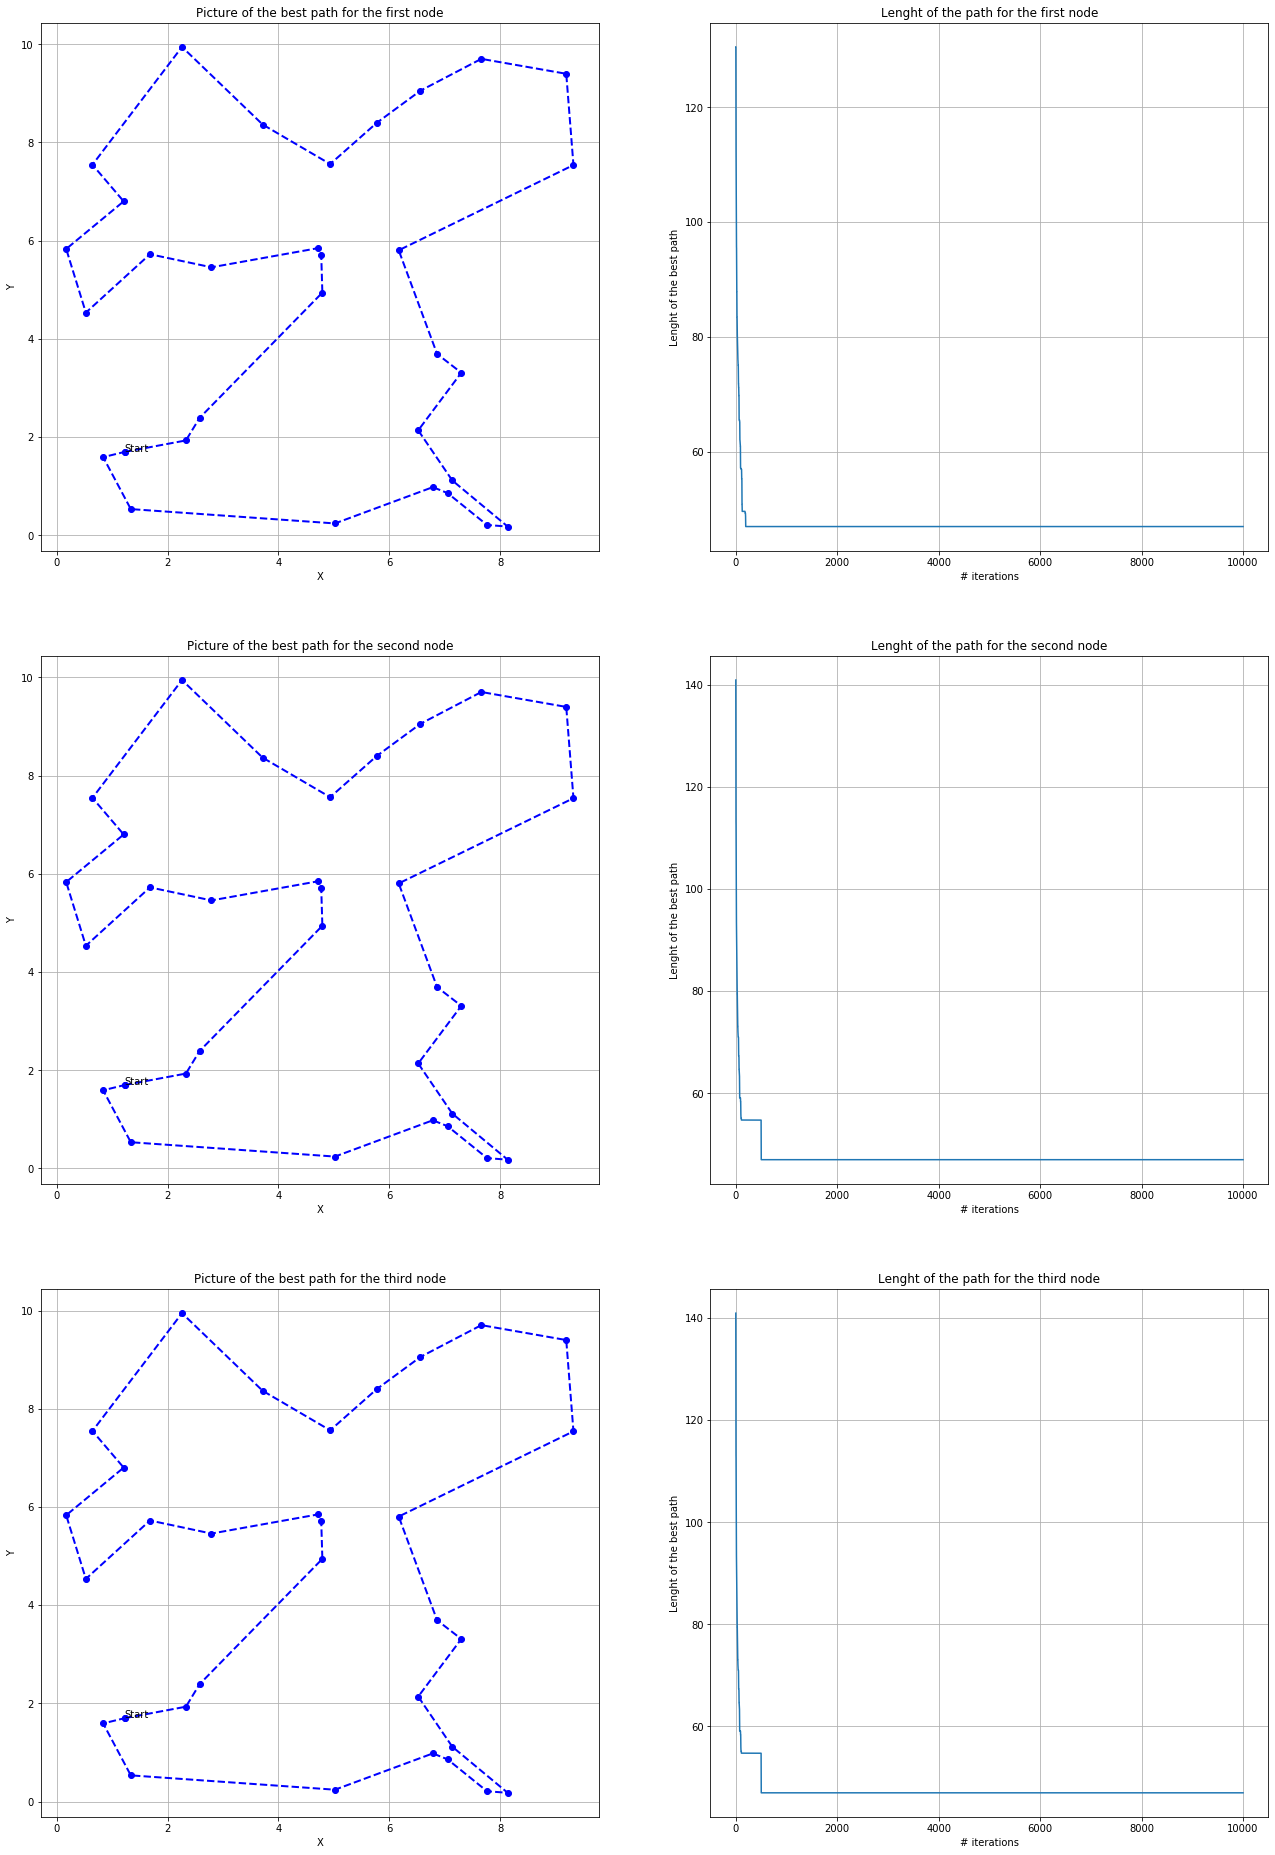

Lenght of the best path for the first node =  46.9884
Lenght of the best path for the second node =  46.9884
Lenght of the best path for the third node =  46.9884


In [7]:
path0 = np.loadtxt('parallelo/3nodi2/SquarePath0.dat').T
path1 = np.loadtxt('parallelo/3nodi2/SquarePath1.dat').T
path2 = np.loadtxt('parallelo/3nodi2/SquarePath2.dat').T
lenght0 = np.loadtxt('parallelo/3nodi2/Lenght_of_the_best_path0.dat')
lenght1 = np.loadtxt('parallelo/3nodi2/Lenght_of_the_best_path1.dat')
lenght2 = np.loadtxt('parallelo/3nodi2/Lenght_of_the_best_path2.dat')
iters = np.arange(10000)

plt.figure(figsize=[22,33])
plt.subplot(3,2,1)
plt.plot(path0[0], path0[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path0[0][0],path0[1][0]))
plt.title('Picture of the best path for the first node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,2)
plt.plot(iters + 1, lenght0)
plt.title('Lenght of the path for the first node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(3,2,3)
plt.plot(path1[0], path1[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path1[0][0],path1[1][0]))
plt.title('Picture of the best path for the second node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,4)
plt.plot(iters + 1, lenght1)
plt.title('Lenght of the path for the second node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(3,2,5)
plt.plot(path2[0], path2[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path2[0][0],path2[1][0]))
plt.title('Picture of the best path for the third node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(3,2,6)
plt.plot(iters + 1, lenght2)
plt.title('Lenght of the path for the third node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print('Lenght of the best path for the first node = ',lenght0[9999])
print('Lenght of the best path for the second node = ',lenght1[9999])
print('Lenght of the best path for the third node = ',lenght2[9999])

### 4 nodi

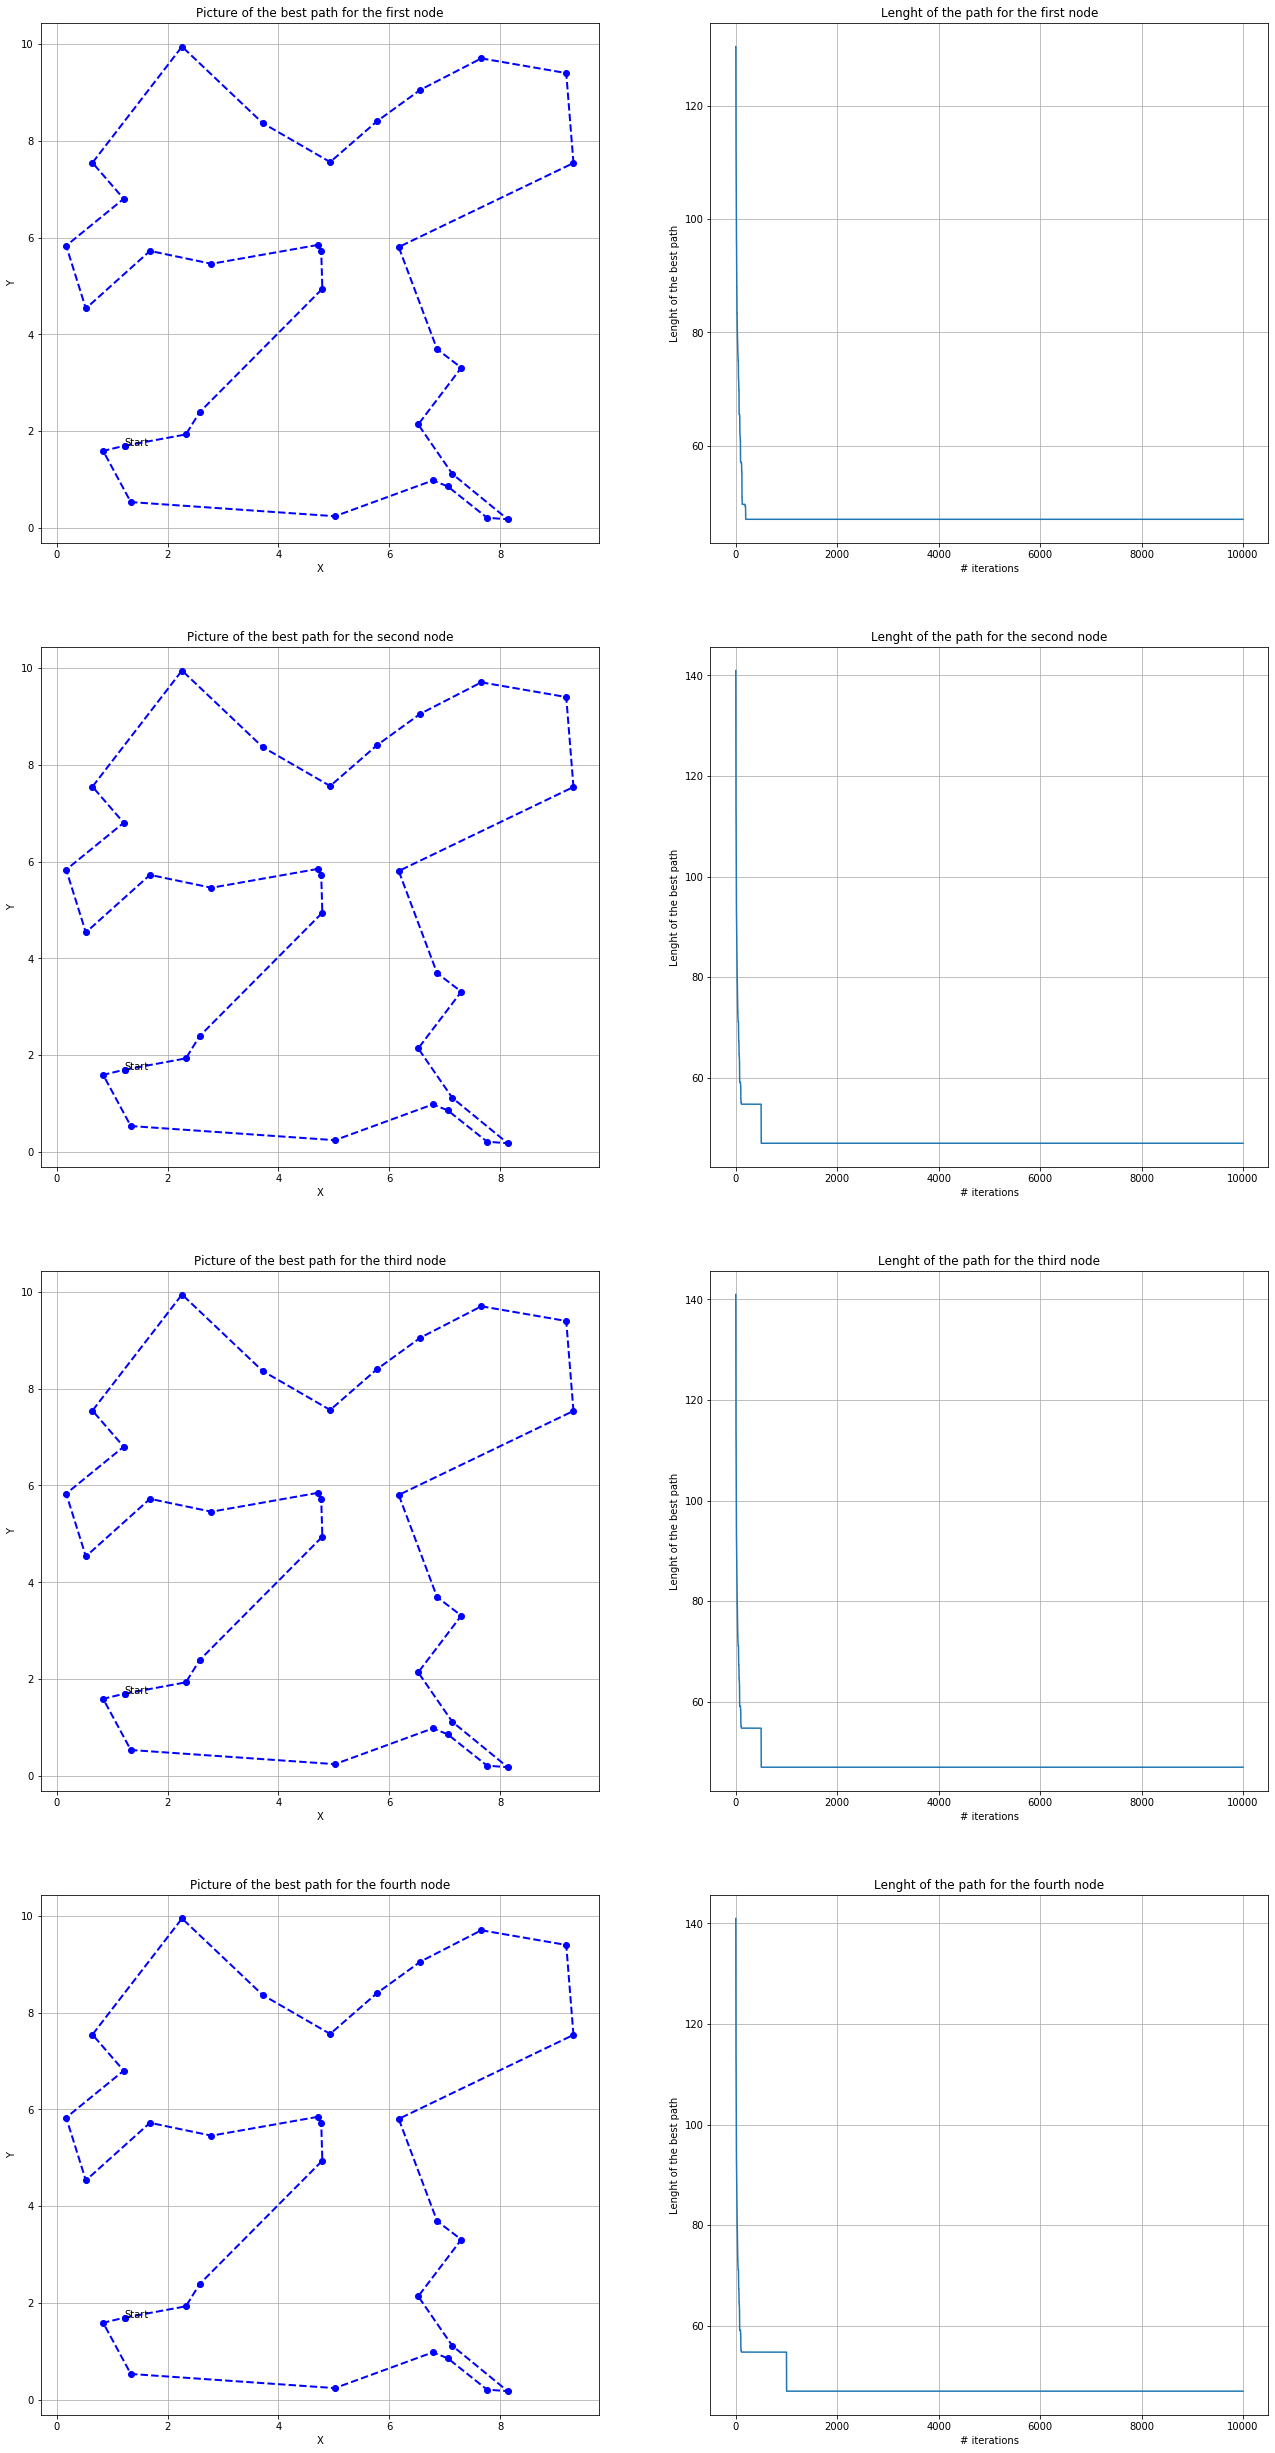

Lenght of the best path for the first node =  46.9884
Lenght of the best path for the second node =  46.9884
Lenght of the best path for the third node =  46.9884
Lenght of the best path for the fourth node =  46.9884


In [8]:
path0 = np.loadtxt('parallelo/4nodi2/SquarePath0.dat').T
path1 = np.loadtxt('parallelo/4nodi2/SquarePath1.dat').T
path2 = np.loadtxt('parallelo/4nodi2/SquarePath2.dat').T
path3 = np.loadtxt('parallelo/4nodi2/SquarePath3.dat').T
lenght0 = np.loadtxt('parallelo/4nodi2/Lenght_of_the_best_path0.dat')
lenght1 = np.loadtxt('parallelo/4nodi2/Lenght_of_the_best_path1.dat')
lenght2 = np.loadtxt('parallelo/4nodi2/Lenght_of_the_best_path2.dat')
lenght3 = np.loadtxt('parallelo/4nodi2/Lenght_of_the_best_path3.dat')
iters = np.arange(10000)

plt.figure(figsize=[22,44])
plt.subplot(4,2,1)
plt.plot(path0[0], path0[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path0[0][0],path0[1][0]))
plt.title('Picture of the best path for the first node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,2)
plt.plot(iters + 1, lenght0)
plt.title('Lenght of the path for the first node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,3)
plt.plot(path1[0], path1[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path1[0][0],path1[1][0]))
plt.title('Picture of the best path for the second node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,4)
plt.plot(iters + 1, lenght1)
plt.title('Lenght of the path for the second node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,5)
plt.plot(path2[0], path2[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path2[0][0],path2[1][0]))
plt.title('Picture of the best path for the third node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,6)
plt.plot(iters + 1, lenght2)
plt.title('Lenght of the path for the third node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.subplot(4,2,7)
plt.plot(path3[0], path3[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.annotate('Start', (path3[0][0],path3[1][0]))
plt.title('Picture of the best path for the fourth node')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.subplot(4,2,8)
plt.plot(iters + 1, lenght3)
plt.title('Lenght of the path for the fourth node')
plt.xlabel('# iterations')
plt.ylabel('Lenght of the best path')
plt.grid()
plt.show()

print('Lenght of the best path for the first node = ',lenght0[9999])
print('Lenght of the best path for the second node = ',lenght1[9999])
print('Lenght of the best path for the third node = ',lenght2[9999])
print('Lenght of the best path for the fourth node = ',lenght3[9999])

#### Ultimi commenti

Con migrazione ogni 500 iterazioni, sia con 3 che con 4 nodi di calcolo, il risultato migliore viene raggiunto quasi subito (circa 200 iterazioni) in entrambi i casi, quindi viene trasmesso agli altri nodi quando avviene la migrazione